<a href="https://colab.research.google.com/github/havaledar/ECON3740_F24/blob/main/ECON3740_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normal Distribution Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import norm

In [2]:
df = pd.read_excel('https://cengage-dps.s3.amazonaws.com/economics/690273_wooldridge_8e/wage1_v1.xlsx')

In [4]:
model = smf.ols('wage ~ educ + exper + tenure', df)

results = model.fit()

residuals = results.resid

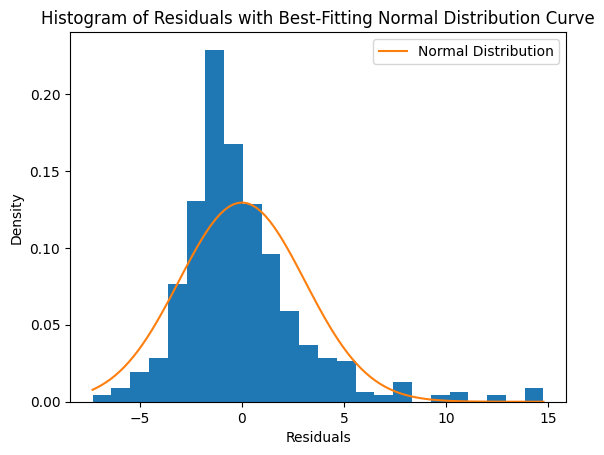

In [8]:
plt.hist(residuals, bins=24, density=True)

x_vals = np.linspace(residuals.min(), residuals.max(), 100)
pdf = norm.pdf(x_vals, residuals.mean(), residuals.std())
plt.plot(x_vals, pdf, label='Normal Distribution')

plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals with Best-Fitting Normal Distribution Curve')
plt.legend()

plt.show()

# Regression

In [9]:
%%capture

!pip install wooldridge

import wooldridge as woo

data = woo.data('ceosal2')

## Line

In [11]:
x = data['ceoten']
y = data['salary']

m2 = smf.ols('salary ~ ceoten', data)

results2 = m2.fit()

intercept, slope = results2.params

y_pred = slope * x + intercept

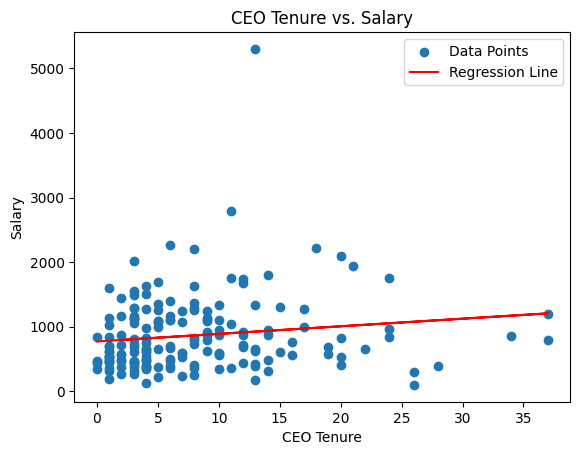

In [12]:
plt.scatter(x, y, label='Data Points')

plt.plot(x, y_pred, color='red', label='Regression Line')

plt.xlabel('CEO Tenure')
plt.ylabel('Salary')
plt.title('CEO Tenure vs. Salary')
plt.legend()

plt.show()

## Interaction

In [31]:
m3 = smf.ols('salary ~ ceoten*mktval', data)

results3 = m3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     13.23
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           8.15e-08
Time:                        11:11:18   Log-Likelihood:                -1360.9
No. Observations:                 177   AIC:                             2730.
Df Residuals:                     173   BIC:                             2743.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       624.2575     69.620      8.967

## base group

In [40]:
m4 = smf.ols('salary ~ ceoten + C(college, Treatment(reference=1))', data)

results4 = m4.fit()

print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.062
Date:                Fri, 01 Nov 2024   Prob (F-statistic):              0.130
Time:                        11:16:40   Log-Likelihood:                -1377.1
No. Observations:                 177   AIC:                             2760.
Df Residuals:                     174   BIC:                             2770.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [45]:
# data['grad'] & data['college']
data['grad_college'] = (data['grad'] == 1) & (data['college'] == 1)
data['grad_college'] = data['grad_college'].astype(int)

m5 = smf.ols('salary ~ ceoten + college + grad + grad_college', data)
results5 = m5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.394
Date:                Fri, 01 Nov 2024   Prob (F-statistic):              0.246
Time:                        11:23:02   Log-Likelihood:                -1377.1
No. Observations:                 177   AIC:                             2762.
Df Residuals:                     173   BIC:                             2775.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      954.3753    273.061      3.495   

In [51]:
data[(data['grad']==1) & (data['college']==1)].shape

(94, 16)

# Seaborn

## Regression plot

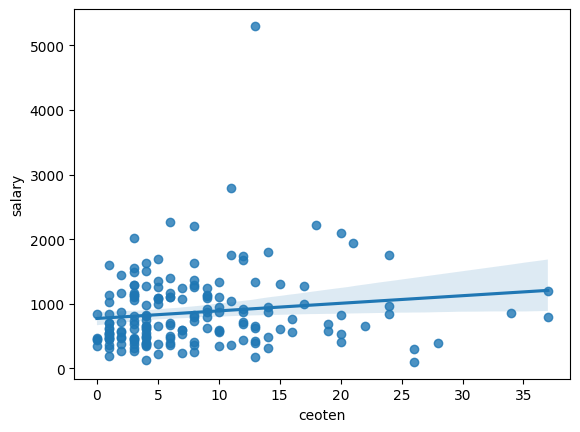

In [14]:
import seaborn as sns

sns.regplot(x = 'ceoten',
            y = 'salary',
            data = data,
            ci=None
            )

plt.show()

### Color#

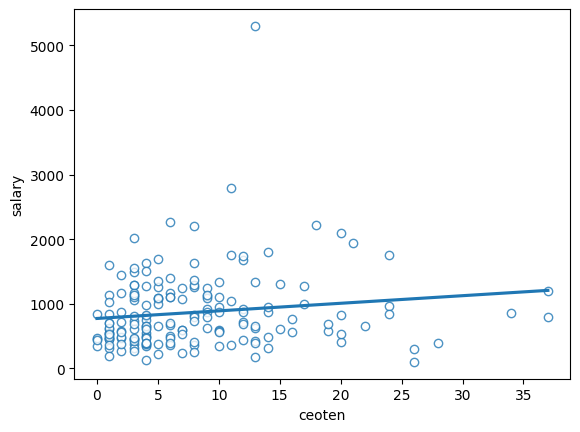

In [16]:
sns.regplot(x = 'ceoten',
            y = 'salary',
            data = data,
            ci=None,
            scatter_kws={'facecolors':'white'}
            )

plt.show()

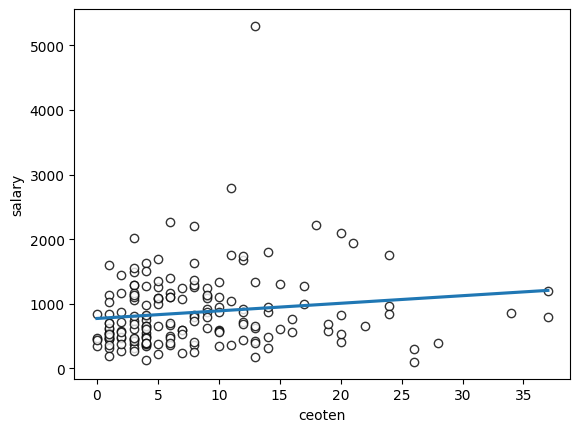

In [17]:
sns.regplot(x = 'ceoten',
            y = 'salary',
            data = data,
            ci=None,
            scatter_kws={'facecolors':'white',
                         'edgecolors':'black'}
            )

plt.show()

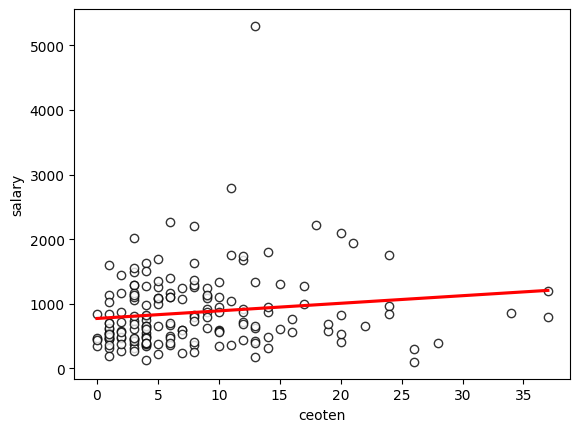

In [18]:
sns.regplot(x = 'ceoten',
            y = 'salary',
            data = data,
            ci=None,
            scatter_kws={'facecolors':'white',
                         'edgecolors':'black'},
            line_kws={'color': 'red'}
            )

plt.show()

## Confidence interval

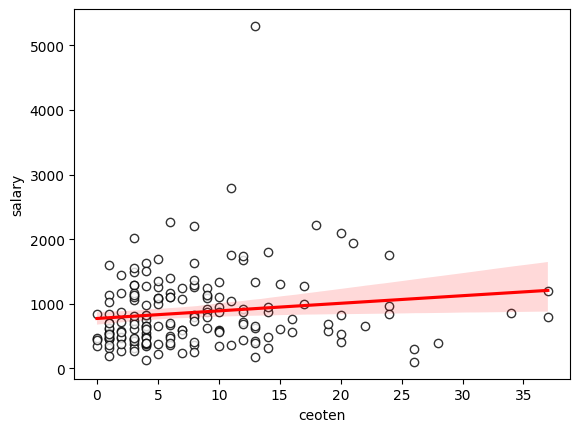

In [19]:
sns.regplot(x = 'ceoten',
            y = 'salary',
            data = data,
            scatter_kws={'facecolors':'white',
                         'edgecolors':'black'},
            line_kws={'color': 'red'}
            )

plt.show()

## Pair Grid

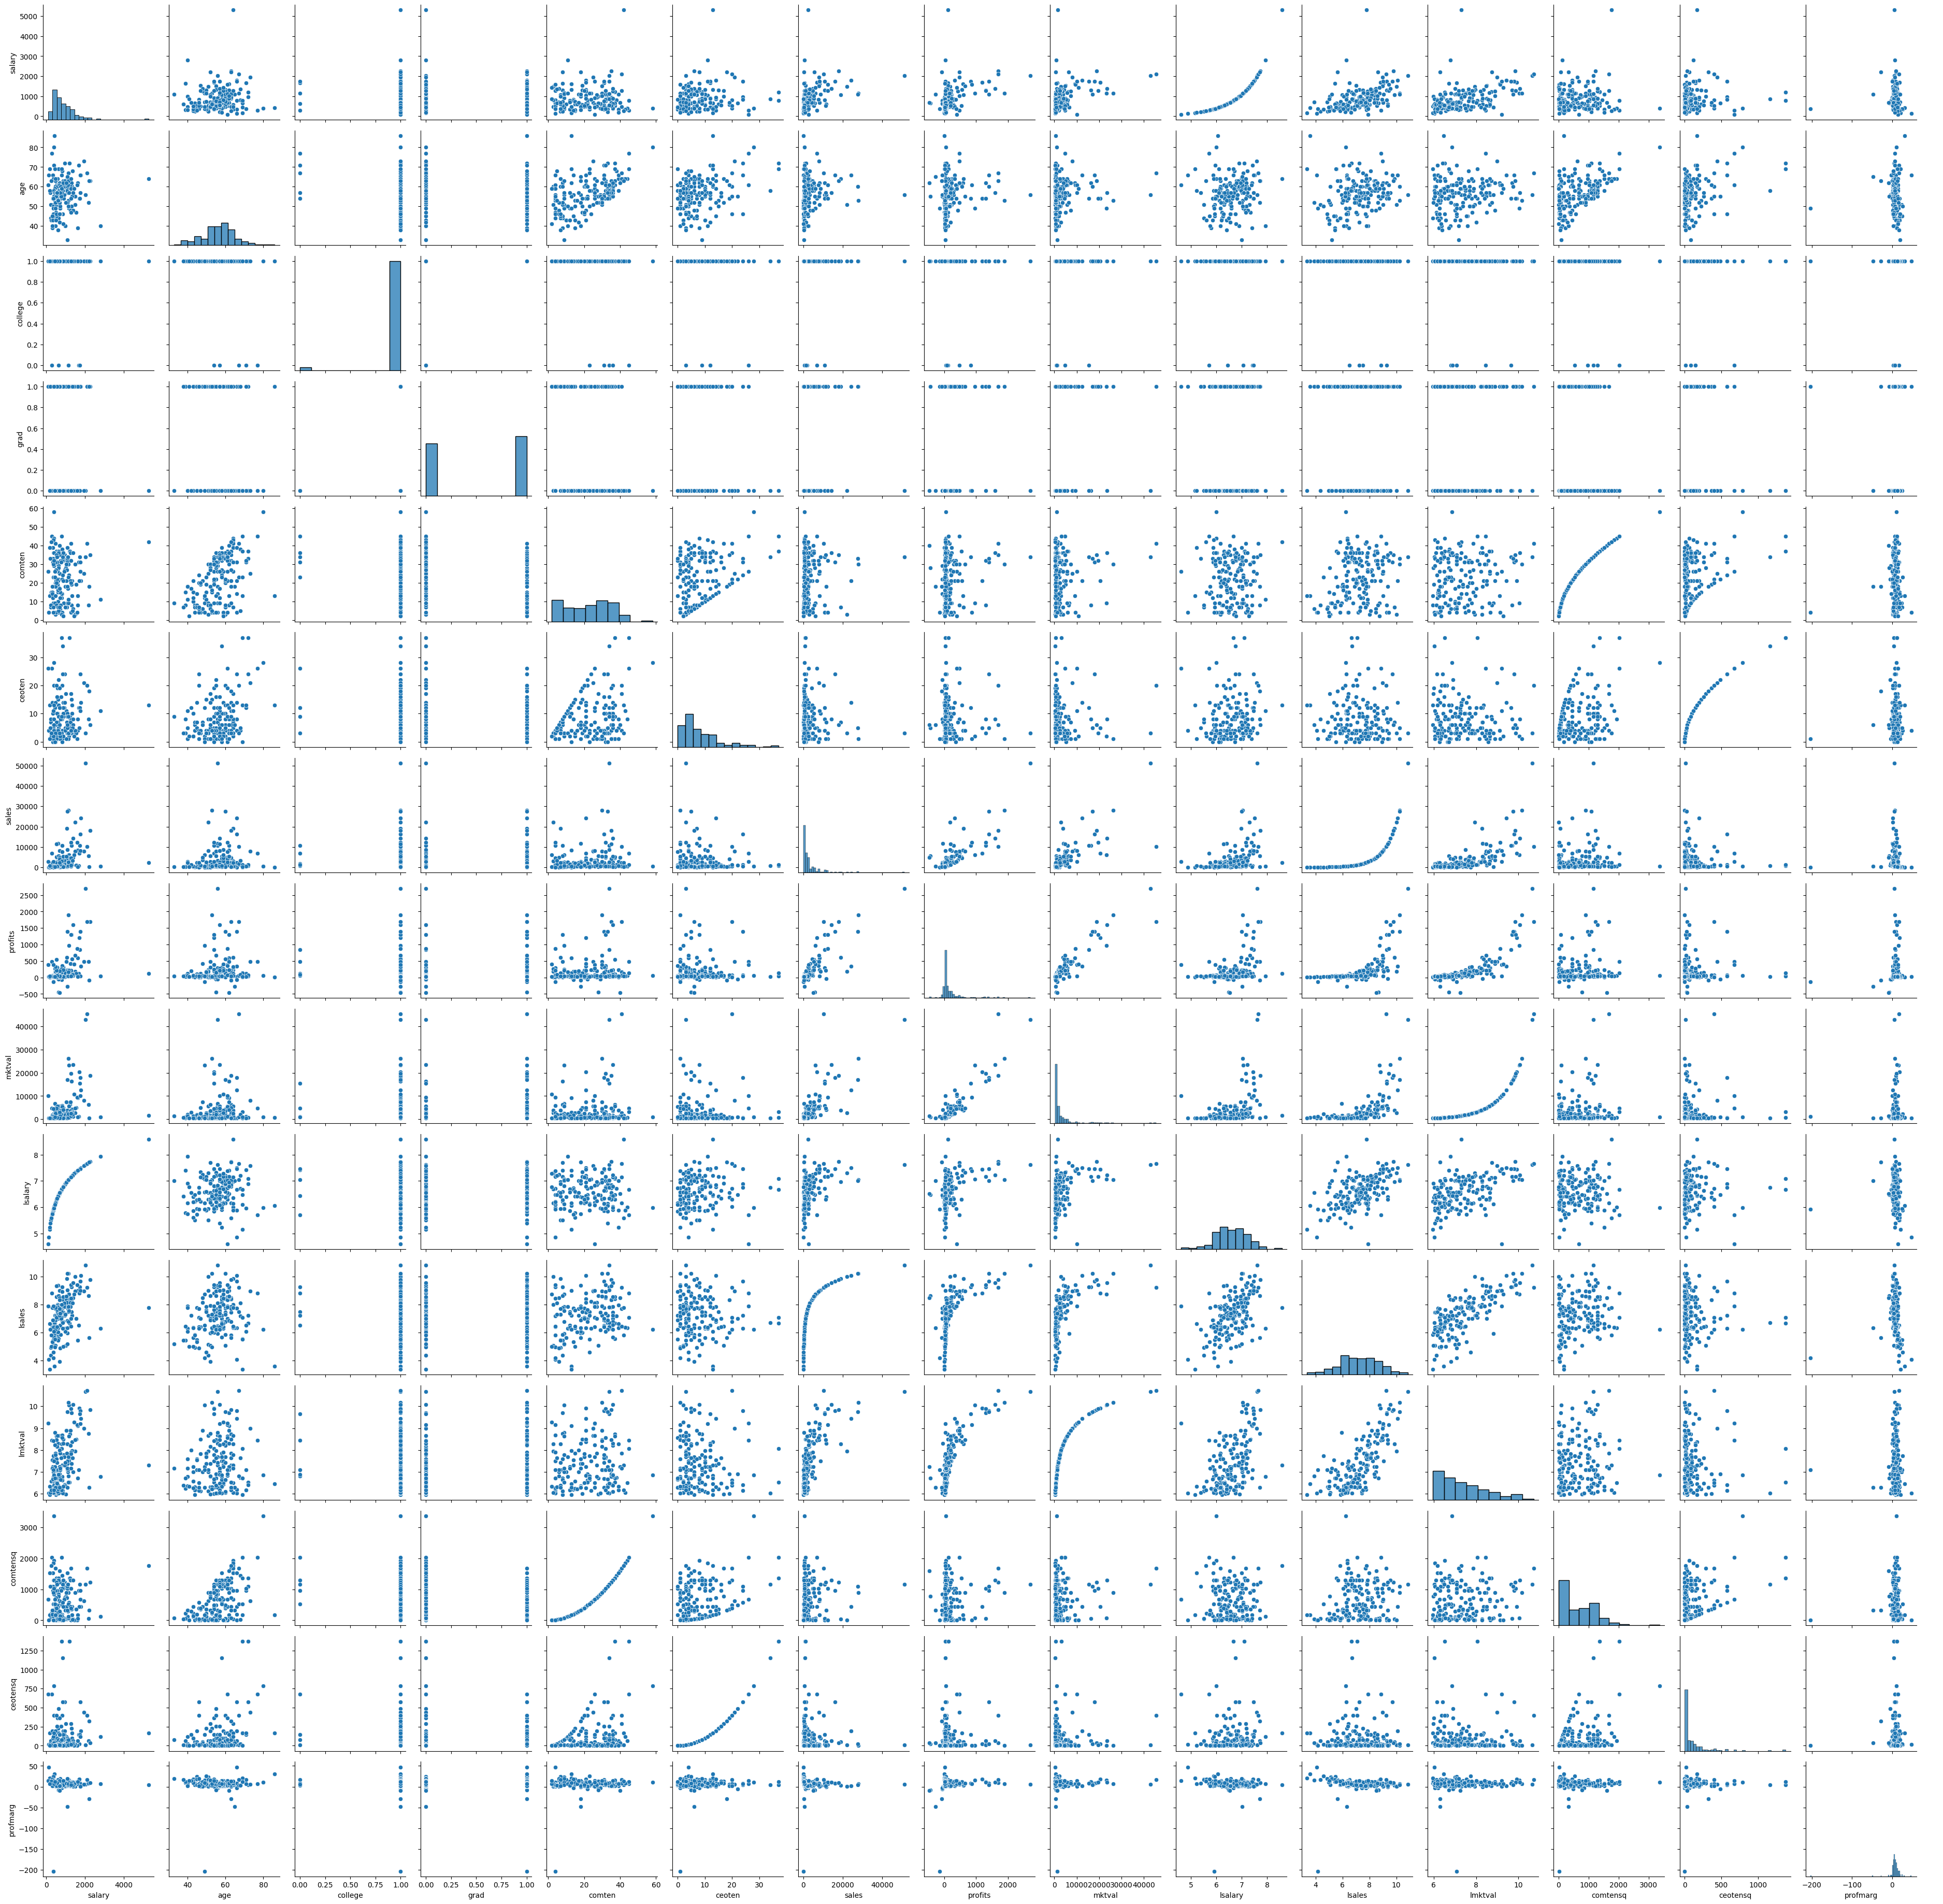

In [20]:
g = sns.PairGrid(data)

g.map_diag(sns.histplot)

g.map_offdiag(sns.scatterplot)

g.add_legend()

plt.show()